In [1]:
import datajoint as dj

import numpy as np
from os import listdir

In [2]:
conf_file = "/usr/people/jabae/seungmount/research/Alex/calcium/datajoint/conf/dj_conf_seung.json"
dj.config.load(conf_file)

dj.conn()

Connecting jabae@seungdj01.princeton.edu:3306


DataJoint connection (connected) jabae@seungdj01.princeton.edu:3306

In [3]:
from pinky40_tables import *

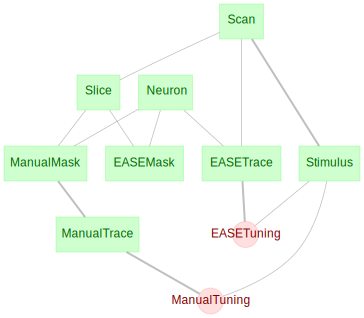

In [4]:
dj.ERD(pinky40)

In [5]:
pinky_scan = Scan()

data = [
    (2, 141, 20, 920),
    (3, 162, 20, 920),
    (4, 187, 22, 920),
    (5, 210, 26, 920),
    (6, 236, 29, 920),
    (9, 251, 32, 920),
    (10, 270, 36, 920),
    (11, 292, 39, 920),
    (12, 314, 43, 920)
]

pinky_scan.insert(data)

In [5]:
Scan()

scan_id,depth,laser_power,wavelength
2,141,20,920
3,162,20,920
4,187,22,920
5,210,26,920
6,236,29,920
9,251,32,920
10,270,36,920
11,292,39,920
12,314,43,920


In [7]:
pinky_slice = Slice()

data = [
    (2, 1, 141),
    (2, 2, 150),
    (2, 3, 157),
    (3, 1, 163),
    (3, 2, 172),
    (3, 3, 178),
    (4, 1, 188),
    (4, 2, 197),
    (4, 3, 203),
    (5, 1, 210),
    (5, 2, 220),
    (5, 3, 225),
    (6, 1, 232),
    (6, 2, 244),
    (6, 3, 250),
    (9, 1, 251),
    (9, 2, 260),
    (9, 3, 265),
    (10, 1, 271),
    (10, 2, 281),
    (10, 3, 288),
    (11, 1, 293),
    (11, 2, 304),
    (11, 3, 308)
]

pinky_slice.insert(data)

In [7]:
Slice()

scan_id,slice_idx,depth
2,1,141
2,2,150
2,3,157
3,1,163
3,2,172
3,3,178
4,1,188
4,2,197
4,3,203
5,1,210


In [11]:
pinky_stimulus = Stimulus()

data_dir = "/usr/people/jabae/seungmount/research/Alex/calcium/datajoint/data/"

scan_list = [2,3,4,5,6,9,10,11,12]
for i in range(len(scan_list)):
    
    scan_id = scan_list[i]
    
    movie = np.load(data_dir+"stimulus/scan{}_stimulus.npy".format(scan_id))
    condition = np.load(data_dir+"stimulus/scan{}_condition.npy".format(scan_id))
    
    data = {
        "scan_id": scan_id,
        "movie": movie[:,:,200:],
        "condition": condition[0,200:]
    }
    pinky_stimulus.insert1(data)

In [5]:
Stimulus()

scan_id,movie,condition
2,=BLOB=,=BLOB=
3,=BLOB=,=BLOB=
4,=BLOB=,=BLOB=
5,=BLOB=,=BLOB=
6,=BLOB=,=BLOB=
9,=BLOB=,=BLOB=
10,=BLOB=,=BLOB=
11,=BLOB=,=BLOB=
12,=BLOB=,=BLOB=


In [9]:
id_map = np.load("../data/id_map.npy")

pinky_neuron = Neuron()
pinky_neuron.insert(id_map, skip_duplicates=True)

In [14]:
Neuron()

segment_id,manual_id,ease_id
579228,433,579228
989772,291,989772
10914339,392,10914339
14448852,307,2608680
17688767,290,0
19780257,323,23683777
21799194,377,3205058
22402130,509,90292018
23346177,480,18833086
23497245,281,101666914


In [11]:
pinky_manual_mask = ManualMask()

d = "../data/manual_masks/"
file_list = listdir(d)

for f in file_list:
    
    mask = np.load(d + f)
    
    elem = f.split("_")
    scan_id = int(elem[1])
    slice_idx = int(elem[2])
    manual_id = int(elem[3][:-4])
    
    key = {"manual_id": manual_id}
    segment_id = (Neuron() & key).fetch("segment_id")
    if segment_id.shape[0] == 0:
        continue
    ease_id = (Neuron() & key).fetch("ease_id")
    
    data = {
        "scan_id": scan_id,
        "slice_idx": slice_idx,
        "manual_id": manual_id,
        "segment_id": segment_id[0],
        "ease_id": ease_id[0],
        "mask": mask
    }
    pinky_manual_mask.insert1(data)

In [15]:
ManualMask()

scan_id,slice_idx,segment_id,manual_id,ease_id,mask
2,1,22402130,509,90292018,=BLOB=
2,1,23497245,281,101666914,=BLOB=
2,1,25024949,335,51320039,=BLOB=
2,1,27231475,393,84832010,=BLOB=
2,1,27269142,408,23410728,=BLOB=
2,1,27283739,360,67981253,=BLOB=
2,1,27328840,496,48234238,=BLOB=
2,1,27367757,548,50713226,=BLOB=
2,1,27653679,373,88764136,=BLOB=
2,1,27680309,528,85479355,=BLOB=


In [6]:
pinky40_manual_trace = ManualTrace()

trace_array = np.load("../data/manual_trace.npy")
trace_keys = np.load("../data/manual_trace_keys.npy")

for i in range(trace_keys.shape[0]):
    
    scan_id = trace_keys[i,0]
    slice_idx = trace_keys[i,1]
    manual_id = trace_keys[i,2]
    
    trace = trace_array[i,:]
    
    key = {"manual_id": manual_id}
    segment_id = (Neuron() & key).fetch("segment_id")
    if segment_id.shape[0] == 0:
        continue
    ease_id = (Neuron() & key).fetch("ease_id")
    
    data = {
        "scan_id": scan_id,
        "slice_idx": slice_idx,
        "manual_id": manual_id,
        "segment_id": segment_id[0],
        "ease_id": ease_id[0],
        "trace": trace
    }
    pinky40_manual_trace.insert1(data)

In [16]:
ManualTrace()

scan_id,slice_idx,segment_id,manual_id,ease_id,trace
2,1,22402130,509,90292018,=BLOB=
2,1,23497245,281,101666914,=BLOB=
2,1,25024949,335,51320039,=BLOB=
2,1,27231475,393,84832010,=BLOB=
2,1,27269142,408,23410728,=BLOB=
2,1,27283739,360,67981253,=BLOB=
2,1,27328840,496,48234238,=BLOB=
2,1,27367757,548,50713226,=BLOB=
2,1,27653679,373,88764136,=BLOB=
2,1,27680309,528,85479355,=BLOB=


In [46]:
pinky40_ease_mask = EASEMask()

mask_stack = np.load("../data/ease_masks.npy")
mask_keys = np.load("../data/ease_masks_keys.npy")

for i in range(mask_keys.shape[0]):
    
    scan_id = mask_keys[i,0]
    slice_idx = mask_keys[i,1]
    ease_id = mask_keys[i,2]
    
    mask = mask_stack[:,:,i]
    
    keys = {}
    key = {"ease_id": ease_id}
    segment_id = (Neuron() & key).fetch("segment_id")
    if segment_id.shape[0] == 0:
        continue
    manual_id = (Neuron() & key).fetch("manual_id")
    
    data = {
        "scan_id": scan_id,
        "slice_idx": slice_idx,
        "manual_id": manual_id[0],
        "segment_id": segment_id[0],
        "ease_id": ease_id,
        "mask": mask
    }
    pinky40_ease_mask.insert1(data, skip_duplicates=True)

In [47]:
EASEMask()

scan_id,slice_idx,segment_id,manual_id,ease_id,mask
2,1,10914339,392,10914339,=BLOB=
2,1,22402130,509,90292018,=BLOB=
2,1,23497245,281,101666914,=BLOB=
2,1,25024949,335,51320039,=BLOB=
2,1,26661605,282,73430227,=BLOB=
2,1,27231475,393,84832010,=BLOB=
2,1,27269142,408,23410728,=BLOB=
2,1,27277010,332,52089750,=BLOB=
2,1,27283739,360,67981253,=BLOB=
2,1,27328840,496,48234238,=BLOB=


In [6]:
pinky40_ease_trace = EASETrace()

trace_array = np.load("../data/ease_trace.npy")
trace_keys = np.load("../data/ease_trace_keys.npy")

for i in range(trace_keys.shape[0]):
    
    scan_id = trace_keys[i,0]
    slice_idx = trace_keys[i,1]
    ease_id = trace_keys[i,2]
    
    trace = trace_array[i,0,:]
    trace_denoised = trace_array[i,1,:]
    
    key = {"ease_id": ease_id}
    segment_id = (Neuron() & key).fetch("segment_id")
    if segment_id.shape[0] == 0:
        continue
    manual_id = (Neuron() & key).fetch("manual_id")
    
    data = {
        "scan_id": scan_id,
        "manual_id": manual_id[0],
        "segment_id": segment_id[0],
        "ease_id": ease_id,
        "trace": trace,
        "trace_denoised": trace_denoised
    }
    pinky40_ease_trace.insert1(data)

In [17]:
EASETrace()

scan_id,segment_id,manual_id,ease_id,trace,trace_denoised
6,989772,291,989772,=BLOB=,=BLOB=
2,10914339,392,10914339,=BLOB=,=BLOB=
3,10914339,392,10914339,=BLOB=,=BLOB=
4,10914339,392,10914339,=BLOB=,=BLOB=
5,10914339,392,10914339,=BLOB=,=BLOB=
6,10914339,392,10914339,=BLOB=,=BLOB=
4,19780257,323,23683777,=BLOB=,=BLOB=
5,19780257,323,23683777,=BLOB=,=BLOB=
5,21799194,377,3205058,=BLOB=,=BLOB=
2,22402130,509,90292018,=BLOB=,=BLOB=


In [6]:
pinky40_manual_tuning = ManualTuning()
pinky40_manual_tuning.populate()

Computed tuning curve for cell 509 in scan 2, slice 1
Computed tuning curve for cell 281 in scan 2, slice 1
Computed tuning curve for cell 335 in scan 2, slice 1
Computed tuning curve for cell 393 in scan 2, slice 1
Computed tuning curve for cell 408 in scan 2, slice 1
Computed tuning curve for cell 360 in scan 2, slice 1
Computed tuning curve for cell 496 in scan 2, slice 1
Computed tuning curve for cell 548 in scan 2, slice 1
Computed tuning curve for cell 373 in scan 2, slice 1
Computed tuning curve for cell 528 in scan 2, slice 1
Computed tuning curve for cell 439 in scan 2, slice 1
Computed tuning curve for cell 557 in scan 2, slice 1
Computed tuning curve for cell 333 in scan 2, slice 1
Computed tuning curve for cell 301 in scan 2, slice 1
Computed tuning curve for cell 334 in scan 2, slice 1
Computed tuning curve for cell 329 in scan 2, slice 1
Computed tuning curve for cell 330 in scan 2, slice 1
Computed tuning curve for cell 446 in scan 2, slice 1
Computed tuning curve for ce

Computed tuning curve for cell 425 in scan 4, slice 1
Computed tuning curve for cell 305 in scan 4, slice 1
Computed tuning curve for cell 361 in scan 4, slice 1
Computed tuning curve for cell 325 in scan 4, slice 1
Computed tuning curve for cell 277 in scan 4, slice 1
Computed tuning curve for cell 512 in scan 4, slice 1
Computed tuning curve for cell 392 in scan 4, slice 2
Computed tuning curve for cell 323 in scan 4, slice 2
Computed tuning curve for cell 491 in scan 4, slice 2
Computed tuning curve for cell 531 in scan 4, slice 2
Computed tuning curve for cell 383 in scan 4, slice 2
Computed tuning curve for cell 320 in scan 4, slice 2
Computed tuning curve for cell 318 in scan 4, slice 2
Computed tuning curve for cell 360 in scan 4, slice 2
Computed tuning curve for cell 284 in scan 4, slice 2
Computed tuning curve for cell 496 in scan 4, slice 2
Computed tuning curve for cell 312 in scan 4, slice 2
Computed tuning curve for cell 349 in scan 4, slice 2
Computed tuning curve for ce

Computed tuning curve for cell 398 in scan 6, slice 3
Computed tuning curve for cell 390 in scan 6, slice 3
Computed tuning curve for cell 291 in scan 9, slice 1
Computed tuning curve for cell 307 in scan 9, slice 1
Computed tuning curve for cell 290 in scan 9, slice 1
Computed tuning curve for cell 377 in scan 9, slice 1
Computed tuning curve for cell 374 in scan 9, slice 1
Computed tuning curve for cell 481 in scan 9, slice 1
Computed tuning curve for cell 295 in scan 9, slice 1
Computed tuning curve for cell 514 in scan 9, slice 1
Computed tuning curve for cell 375 in scan 9, slice 1
Computed tuning curve for cell 398 in scan 9, slice 1
Computed tuning curve for cell 390 in scan 9, slice 1
Computed tuning curve for cell 374 in scan 9, slice 2
Computed tuning curve for cell 434 in scan 9, slice 2
Computed tuning curve for cell 378 in scan 9, slice 2
Computed tuning curve for cell 398 in scan 9, slice 2
Computed tuning curve for cell 374 in scan 9, slice 3
Computed tuning curve for ce

In [7]:
ManualTuning()

scan_id,slice_idx,segment_id,manual_id,ease_id,tuning_curve
2,1,22402130,509,90292018,=BLOB=
2,1,23497245,281,101666914,=BLOB=
2,1,25024949,335,51320039,=BLOB=
2,1,27231475,393,84832010,=BLOB=
2,1,27269142,408,23410728,=BLOB=
2,1,27283739,360,67981253,=BLOB=
2,1,27328840,496,48234238,=BLOB=
2,1,27367757,548,50713226,=BLOB=
2,1,27653679,373,88764136,=BLOB=
2,1,27680309,528,85479355,=BLOB=


In [8]:
pinky40_ease_tuning = EASETuning()
pinky40_ease_tuning.populate()

Computed tuning curve for cell 989772 in scan 6
Computed tuning curve for cell 10914339 in scan 2
Computed tuning curve for cell 10914339 in scan 3
Computed tuning curve for cell 10914339 in scan 4
Computed tuning curve for cell 10914339 in scan 5
Computed tuning curve for cell 10914339 in scan 6
Computed tuning curve for cell 23683777 in scan 4
Computed tuning curve for cell 23683777 in scan 5
Computed tuning curve for cell 3205058 in scan 5
Computed tuning curve for cell 90292018 in scan 2
Computed tuning curve for cell 90292018 in scan 3
Computed tuning curve for cell 18833086 in scan 5
Computed tuning curve for cell 101666914 in scan 2
Computed tuning curve for cell 50227332 in scan 4
Computed tuning curve for cell 20152808 in scan 4
Computed tuning curve for cell 40091043 in scan 5
Computed tuning curve for cell 51320039 in scan 2
Computed tuning curve for cell 51320039 in scan 3
Computed tuning curve for cell 51320039 in scan 4
Computed tuning curve for cell 3084806 in scan 5
Com

In [9]:
EASETuning()

scan_id,segment_id,manual_id,ease_id,tuning_curve
2,10914339,392,10914339,=BLOB=
2,22402130,509,90292018,=BLOB=
2,23497245,281,101666914,=BLOB=
2,25024949,335,51320039,=BLOB=
2,26661605,282,73430227,=BLOB=
2,27231475,393,84832010,=BLOB=
2,27269142,408,23410728,=BLOB=
2,27277010,332,52089750,=BLOB=
2,27283739,360,67981253,=BLOB=
2,27328840,496,48234238,=BLOB=
